In [ ]:
import numpy as np
import pandas as pd
import librosa
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mounting google Drive to import data
path = '/content/drive/MyDrive/Assignment_2_data/dataset'
data_path=os.path.join(path, "X")
label_path=os.path.join(path, "Y")

In [ ]:
x_train = np.load('/content/drive/MyDrive/Assignment_2_data/x_train.npy')
x_test = np.load('/content/drive/MyDrive/Assignment_2_data/x_test.npy')
y_train = np.load('/content/drive/MyDrive/Assignment_2_data/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Assignment_2_data/y_test.npy')

In [ ]:
x_train.shape
y_train.shape

(10000, 10)

In [ ]:
input_shape= x_train.shape
ANNmodel = models.Sequential()
ANNmodel.add(layers.Flatten())
ANNmodel.add(layers.Dense(256, activation='relu'))
ANNmodel.add(layers.Dropout(0.5))
ANNmodel.add(layers.Dense(128, activation='relu'))
ANNmodel.add(layers.Dropout(0.5))
ANNmodel.add(layers.Dense(64, activation='relu'))
ANNmodel.add(layers.Dropout(0.5))
ANNmodel.add(layers.Dense(32, activation='relu'))
ANNmodel.add(layers.Dropout(0.5))
ANNmodel.add(layers.Dense(10, activation='sigmoid'))


In [ ]:
 # `input_shape` is the shape of the input data
ANNmodel.build(input_shape = input_shape)                        # e.g. input_shape = (None, 32, 32, 3)
ANNmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (10000, 64000)            0         
                                                                 
 dense_5 (Dense)             (10000, 256)              16384256  
                                                                 
 dropout_4 (Dropout)         (10000, 256)              0         
                                                                 
 dense_6 (Dense)             (10000, 128)              32896     
                                                                 
 dropout_5 (Dropout)         (10000, 128)              0         
                                                                 
 dense_7 (Dense)             (10000, 64)               8256      
                                                                 
 dropout_6 (Dropout)         (10000, 64)              

In [ ]:
ANNmodel.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath = '/content/drive/MyDrive/Assignment_2_data/ANN_best.epoch-loss.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=ANNmodel.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=126, verbose = 1, callbacks=[checkpoint])

Epoch 1/126
312/313 [============================>.] - ETA: 0s - loss: 0.5987 - accuracy: 0.1188
Epoch 1: val_accuracy improved from -inf to 0.04800, saving model to /content/drive/MyDrive/Assignment_2_data/ANN_best.epoch-loss.hdf5
313/313 [==============================] - 8s 15ms/step - loss: 0.5983 - accuracy: 0.1190 - val_loss: 0.4588 - val_accuracy: 0.0480
Epoch 2/126
311/313 [============================>.] - ETA: 0s - loss: 0.4156 - accuracy: 0.1125
Epoch 2: val_accuracy did not improve from 0.04800
313/313 [==============================] - 3s 11ms/step - loss: 0.4156 - accuracy: 0.1125 - val_loss: 0.4556 - val_accuracy: 0.0480
Epoch 3/126
308/313 [============================>.] - ETA: 0s - loss: 0.4031 - accuracy: 0.1128
Epoch 3: val_accuracy did not improve from 0.04800
313/313 [==============================] - 3s 11ms/step - loss: 0.4031 - accuracy: 0.1125 - val_loss: 0.4572 - val_accuracy: 0.0480
Epoch 4/126
311/313 [============================>.] - ETA: 0s - loss: 0.397

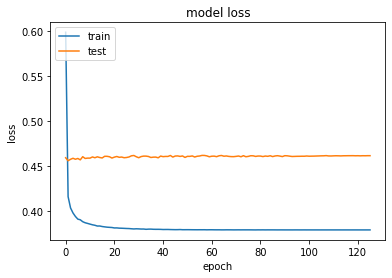

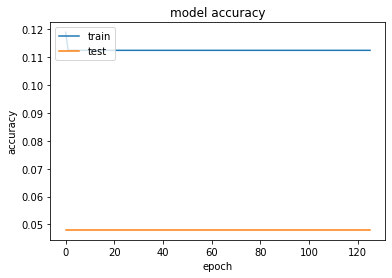

In [ ]:
from matplotlib import pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import keras
ANNmodel=keras.models.load_model('/content/drive/MyDrive/Assignment_2_data/ANN_best.epoch-loss.hdf5')
accuracy = CNNmodel.evaluate(x_test, y_test)
pred=CNNmodel.predict(x_test)

In [ ]:
def modify_predictions(y_pred, th):
  for arr in y_pred:
    i = 0
    for z in arr:
      if(z>=th):
        arr[i] = 1
      else:
        arr[i] = 0
      i = i+1
  return y_pred

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, modify_predictions(pred, 0.)))

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, pred)